# Exercise 2: Logistic Regression

Import necessary packages: Numpy, Pandas, matplotlib

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [4]:
path_to_train = '/Users/Eva/Downloads/zip.train'
path_to_test = '/Users/Eva/Downloads/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify yourself

X_train = X_train[np.logical_or(y_train == 1, y_train == 9)]
X_test = X_test[np.logical_or(y_test == 1, y_test == 9)]

In [5]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


(90,)


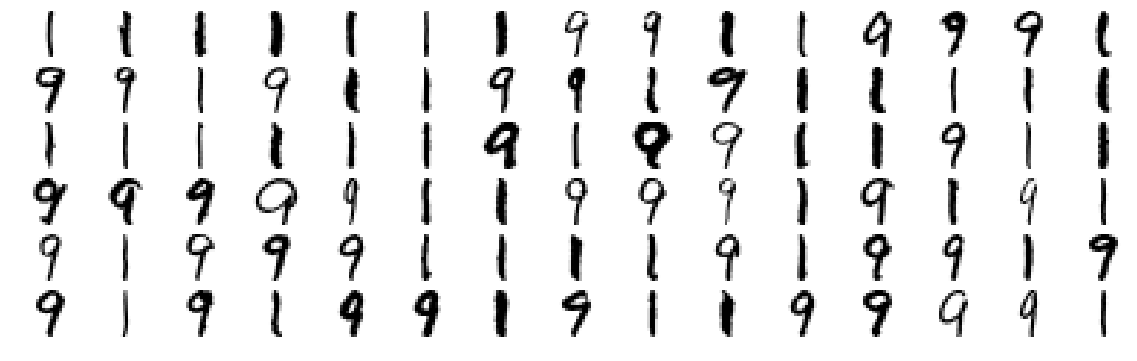

In [5]:
show_numbers(X_train)

Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data. Implement the Cross Entropy and the Sigmoid function from scratch.

In [266]:
class LogisticRegression():
    def __init__(self, lr=0.01, num_iter=10000):
        self.loss = []
        self.w = None
        self.b = None
        self.lr =lr
        self.num_iter = num_iter
        
    def sigmoid_function(self,X):
        """
        Sigmoid function for some data X given slope/weight and bias
        """
        z = np.dot(X,self.w) + self.b
        return 1/(1+np.exp(-z))
        
    def cross_entropy_loss(self, y_hat, y):
        """
        Cross entropy loss for a prediction given the actual labels
        """
        # Or sum?
        #return np.sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))
        return (-y*np.log(y_hat)-(1-y)*np.log(1-y_hat)).mean()
        
        
    def fit(self, X, y):
        """
        Find optimal fit of sigmoid function do data by maximizing log-likelihood for the 
        training data given model parameters, respective minimizing the cross entropy loss.
        """
        # Add bias into X
        #X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        # Weight and bias initialization
        self.w = np.zeros((X.shape[1]))
        self.b = 1
        # Iterate using current guess for w
        for i in range(self.num_iter):
            y_hat = self.sigmoid_function(X) # shape = (1649,1)

            ## Document loss
            self.loss.append(self.cross_entropy_loss(y_hat, y))
            
            ## Update w based on predefined learning rate and observed gradient
            dw = 1/y.size * np.dot(X.T,(y_hat-y))
            db = (y_hat-y).mean()
            self.w -= self.lr * dw
            self.b -= self.lr * db
    
    def plot_loss(self):
        plt.plot(list(range(len(self.loss))),self.loss)
        plt.xlabel('Iterations')
        plt.ylabel('Cross Entropy Loss')
        plt.show()
        
    def predict_proba(self,X):
        #X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return self.sigmoid_function(X)
        
    #def predict(self, X, threshold):
    #    return self.predict_proba(X) >= threshold
    
    def accuray(self,yhat,y):
        print('Accuracy: {:f}%'.format(yhat[np.where(yhat==y)].shape[0]/yhat.shape[0]))
        return None

In [267]:
LR = LogisticRegression()

In [268]:
y_train = y_train[np.logical_or(y_train==1,y_train==9)]
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


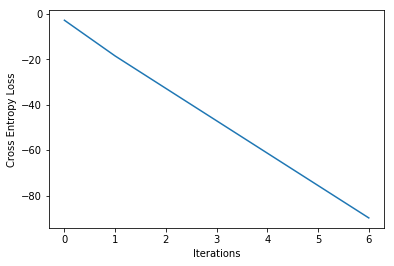

In [269]:
LR.plot_loss()

In [270]:
yhat = LR.predict_proba(X_test)

In [271]:
y_test = y_test[np.logical_or(y_test==1,y_test==9)]
LR.accuray(yhat,y_test)

Accuracy: 0.598639%


Logistic Regression can be interpreted as a neural network with just a single layer. It uses the Cross Entropy to measure the performance of the layer (i.e. of the "trained" weight **w**). In ML we call this the **Loss function**. 

What happens when you take the Means Squared Error (MSE) instead of the Cross Entropy? Does this also work? Implement MSE and try for yourself.


(Optional) Can you think of a way to classify more than one class (in this case 10 classes)? How would you change the way **w** is defined?